# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# for Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
# for KNN
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Defining Functions

In [2]:
def get_metadata(dataframe):
    '''Gets all the Metadata Information about the Dataframe'''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 80)
    print("STATISTICAL INFORMATION\n")
    display(dataframe.describe(include='all'))
    print("=" * 80)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 80)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 80)
    print("NULL Values Check")
    for col in dataframe.columns:
        print(col, dataframe[col].isnull().sum())
    print("=" * 80)
    print("UNIQUE VALUES IN EVERY COLUMN")
    for col in dataframe.columns:
        print(col)
        print(dataframe[col].unique())
        print('-' * 80)
    categorical_cols = [var for var in dataframe.columns if dataframe[var].dtype=='O']
    numerical_cols = [var for var in dataframe.columns if dataframe[var].dtype!='O']
    print("CATEGORICAL FEATURES\n", categorical_cols)
    print("=" * 80)
    print("NUMERICAL FEATURES\n", numerical_cols)
    print("=" * 80)
    print("Negative Valued Column")
    for col in numerical_cols:
        if min(dataframe[col]) < 0:
            print(col)
    print("=" * 80)
    display(dataframe.head(3))

In [3]:
def analyze_target_variable(Y_train, Y_test):
    '''Analyzes the frequency of Target Variable in Y_train and Y_test'''
    print("Value Counts of Target Variables")
    print("Y_train\n", Y_train.value_counts())
    print("\nY_test\n", Y_test.value_counts())

In [4]:
def naive_bayes_model(model, X_train, X_test, Y_train, Y_test):
    # model: GaussianNB(), MultMultinomialNB(), BernoBernoulliNB()
    print("Model\n", model)
    print("Training Model...\n")
    model.fit(X_train, Y_train)
    
    print("Model Prediction...")
    Y_pred = model.predict(X_test)
    
    print("=" * 80)
    print("Confusion Matrix\n", confusion_matrix(Y_test, Y_pred))
    print("=" * 80)
    print("Accuracy Score\n", accuracy_score(Y_test, Y_pred))
    print("=" * 80)
    print("Classification Report\n", classification_report(Y_test, Y_pred))

In [5]:
def knn_model(k, X_train, X_test, Y_train, Y_test, weights='uniform', metric='minkowski'):
    # weights: uniform, distance ; metric: minkowski, euclidean, manhattan, cosine
    knn = KNeighborsClassifier(n_neighbors = k, weights=weights, metric=metric)
    print("No of Neighbors : ", k)
    print("Weights :", weights)
    print("Metric : ", metric)
    
    print("Training Model...\n")
    knn.fit(X_train, Y_train)
    
    print("Model Prediction...")
    Y_pred = knn.predict(X_test)
    
    print("=" * 80)
    print("Confusion Matrix\n", confusion_matrix(Y_test, Y_pred))
    print("=" * 80)
    print("Accuracy Score\n", accuracy_score(Y_test, Y_pred))
    print("=" * 80)
    print("Classification Report\n", classification_report(Y_test, Y_pred))

# sbwu_elections.csv

In [6]:
elections = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\sbwu_elections.csv")
elections.head(3)

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin,Result
0,Camp Road Hamburg,"Buffalo, NY",NY,No,12/9/2021,8,12,20,-0.20,No
1,Genessee St,"Buffalo, NY",NY,No,12/9/2021,15,9,24,0.25,Yes
2,Elmwood,"Buffalo, NY",NY,No,12/9/2021,19,8,27,0.41,Yes


In [7]:
get_metadata(elections)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          76 non-null     object 
 1   Location       76 non-null     object 
 2   State          76 non-null     object 
 3   RTWState       76 non-null     object 
 4   VoteCountDate  76 non-null     object 
 5   VotesYes       76 non-null     int64  
 6   VotesNo        76 non-null     int64  
 7   VoteTotal      76 non-null     int64  
 8   Margin         76 non-null     float64
 9   Result         76 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 6.1+ KB
None
STATISTICAL INFORMATION



,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin,Result
count,76,76,76,76,76,76.000000,76.000000,76.000000,76.000000,76
unique,76,47,18,2,29,NaN,NaN,NaN,NaN,2
top,Camp Road Hamburg,"Eugene, OR",NY,No,5/3/2022,NaN,NaN,NaN,NaN,Yes
freq,1,8,17,49,10,NaN,NaN,NaN,NaN,66
mean,NaN,NaN,NaN,NaN,NaN,13.986842,4.644737,18.631579,0.561316,NaN
std,NaN,NaN,NaN,NaN,NaN,7.399988,6.202589,11.282839,0.393695,NaN
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,5.000000,-0.310000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.750000,1.000000,13.000000,0.225000,NaN
50%,NaN,NaN,NaN,NaN,NaN,12.500000,2.500000,15.500000,0.685000,NaN
75%,NaN,NaN,NaN,NaN,NaN,17.000000,7.000000,21.000000,0.882500,NaN


Dataframe Shape
 (76, 10)
Number of Duplicate Rows
 0
NULL Values Check
Store 0
Location 0
State 0
RTWState 0
VoteCountDate 0
VotesYes 0
VotesNo 0
VoteTotal 0
Margin 0
Result 0
UNIQUE VALUES IN EVERY COLUMN
Store
['Camp Road Hamburg' 'Genessee St' 'Elmwood' 'Power & Baseline Road'
 'Sheridan & Bailey' 'Transit Commons / Depew' 'Broadway & Denny'
 'Crismon & Southern' 'I-75 at Merchant Drive' 'New York Reserve Roastery'
 'Brighton Monroe & Clover' 'Mount Hope Ave' 'Delaware & Chippewa'
 'Overland Park - 75th & I-35' 'Meadow St' 'Commons' 'College Ave'
 'Commonwealth Ave' 'Harvard St' '29th & Willamette'
 'Bloomfield, Liberty Ave' 'Huntsman Square'
 'Huguenot Village Shopping Center' 'Westchester Commons'
 'Forest Hill Ave' 'Broad and Willow Lawn' 'Midlothian & Carmia Way'
 'Palm Springs Mile' 'Starbucks Reserve Roastery' 'Walden & Anderson'
 '8th Ave & 49th St' 'Rock Creek Parkway' 'Gallows and Gatehouse'
 'Leesburg Plaza' 'N Charles St' 'Hopewell' 'University & Main'
 'Northwest Hwy & 

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin,Result
0,Camp Road Hamburg,"Buffalo, NY",NY,No,12/9/2021,8,12,20,-0.20,No
1,Genessee St,"Buffalo, NY",NY,No,12/9/2021,15,9,24,0.25,Yes
2,Elmwood,"Buffalo, NY",NY,No,12/9/2021,19,8,27,0.41,Yes


### Encoding Categorical Values

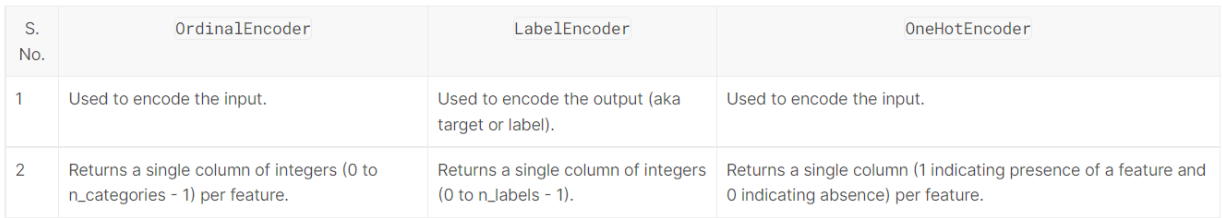

OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit data that has the shape of (n_samples,)

In [8]:
elections_categorical_cols = [var for var in elections.columns if elections[var].dtype=='O']
elections_numerical_cols = [var for var in elections.columns if elections[var].dtype!='O']

In [9]:
elections_categorical_cols.remove('Result')
elections_categorical_cols

['Store', 'Location', 'State', 'RTWState', 'VoteCountDate']

In [10]:
ordinal_encoder = OrdinalEncoder()

elections_feature_encoded = ordinal_encoder.fit_transform(elections[elections_categorical_cols])
elections_feature_encoded_df = pd.DataFrame(elections_feature_encoded, columns=elections_categorical_cols)
elections_feature_encoded_df[elections_numerical_cols] = elections[elections_numerical_cols]
elections_feature_encoded_df

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin
0,21.0,6.0,11.0,0.0,0.0,8,12,20,-0.20
1,37.0,6.0,11.0,0.0,0.0,15,9,24,0.25
2,33.0,6.0,11.0,0.0,0.0,19,8,27,0.41
3,59.0,23.0,0.0,1.0,1.0,25,3,28,0.79
4,63.0,6.0,11.0,0.0,5.0,15,12,27,0.11
...,...,...,...,...,...,...,...,...,...
71,7.0,24.0,2.0,1.0,23.0,10,3,13,0.54
72,2.0,17.0,2.0,1.0,23.0,8,1,9,0.78
73,1.0,21.0,7.0,0.0,23.0,15,2,17,0.76
74,62.0,17.0,2.0,1.0,23.0,10,7,17,0.18


## Train and Test Split

In [11]:
X = elections_feature_encoded_df
X.head(3)

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin
0,21.0,6.0,11.0,0.0,0.0,8,12,20,-0.20
1,37.0,6.0,11.0,0.0,0.0,15,9,24,0.25
2,33.0,6.0,11.0,0.0,0.0,19,8,27,0.41


In [12]:
Y = elections['Result']
Y.head(3)

0     No
1    Yes
2    Yes
Name: Result, dtype: object

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=16, stratify=Y)

In [14]:
Y.value_counts()

Yes    66
No     10
Name: Result, dtype: int64

In [15]:
Y_train.value_counts()

Yes    46
No      7
Name: Result, dtype: int64

In [16]:
Y_test.value_counts()

Yes    20
No      3
Name: Result, dtype: int64

## Naive Bayes 

The 'Margin' column has Negative Value. We can't apply MultinomialNB()

In [17]:
gaussian_model = GaussianNB()

In [18]:
naive_bayes_model(gaussian_model, X_train, X_test, Y_train, Y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[ 3  0]
 [ 0 20]]
Accuracy Score
 1.0
Classification Report
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00        20

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [19]:
bernoulli_model = BernoulliNB()

In [20]:
naive_bayes_model(bernoulli_model, X_train, X_test, Y_train, Y_test)

Model
 BernoulliNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[ 3  0]
 [ 0 20]]
Accuracy Score
 1.0
Classification Report
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00        20

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



## K-Nearest Neighbor

In [21]:
elections_feature_encoded_df.head(3)

,Store,Location,State,RTWState,VoteCountDate,VotesYes,VotesNo,VoteTotal,Margin
0,21.0,6.0,11.0,0.0,0.0,8,12,20,-0.20
1,37.0,6.0,11.0,0.0,0.0,15,9,24,0.25
2,33.0,6.0,11.0,0.0,0.0,19,8,27,0.41


### Normalizing the Values

__StandardScaler__ follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.    

__MinMaxScaler__ scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].    

In the presence of *outliers*, __StandardScaler does not guarantee balanced feature scales__, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.    

By using __RobustScaler(), we can remove the outliers__ and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [22]:
elections_encoded_df = elections_feature_encoded_df
elections_encoded_df['Result'] = elections['Result']

array([[<AxesSubplot:title={'center':'Location'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'Margin'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'RTWState'}, xlabel='[Result]'>],
       [<AxesSubplot:title={'center':'State'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'Store'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'VoteCountDate'}, xlabel='[Result]'>],
       [<AxesSubplot:title={'center':'VoteTotal'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'VotesNo'}, xlabel='[Result]'>,
        <AxesSubplot:title={'center':'VotesYes'}, xlabel='[Result]'>]],
      dtype=object)

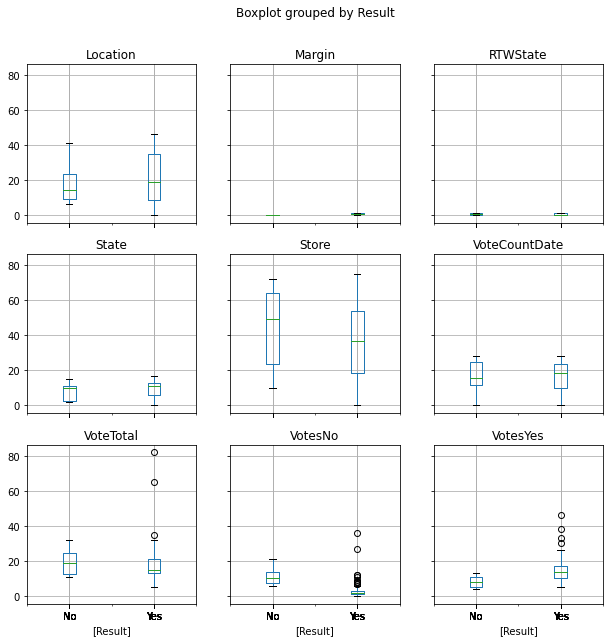

In [23]:
elections_feature_encoded_df.boxplot(by='Result', column=list(elections_encoded_df).remove('Result'), figsize=(10, 10))

#### MinMaxScaler()

In [24]:
mm_scaler = MinMaxScaler()

In [25]:
mm_scaler.fit(X_train)

MinMaxScaler()

In [26]:
mm_X_train_scaled = mm_scaler.transform(X_train)
mm_X_test_scaled = mm_scaler.transform(X_test)

In [27]:
mm_X_train_scaled

array([[0.96      , 0.13043478, 0.64705882, 0.        , 0.46428571,
        0.15151515, 0.37037037, 0.25      , 0.16666667],
       [0.65333333, 0.7826087 , 1.        , 1.        , 0.92857143,
        0.06060606, 0.18518519, 0.11666667, 0.30833333],
       [0.89333333, 0.13043478, 0.64705882, 0.        , 0.17857143,
        0.3030303 , 0.44444444, 0.36666667, 0.25833333],
       [0.78666667, 0.5       , 0.        , 1.        , 0.03571429,
        0.60606061, 0.11111111, 0.38333333, 0.825     ],
       [0.84      , 0.13043478, 0.64705882, 0.        , 0.17857143,
        0.3030303 , 0.44444444, 0.36666667, 0.25833333],
       [0.21333333, 0.08695652, 0.35294118, 0.        , 0.89285714,
        0.        , 0.        , 0.        , 1.        ],
       [0.01333333, 0.45652174, 0.41176471, 0.        , 0.82142857,
        0.3030303 , 0.07407407, 0.2       , 0.8       ],
       [0.37333333, 0.5       , 0.        , 1.        , 0.10714286,
        0.18181818, 0.11111111, 0.15      , 0.64166667],


In [28]:
knn_model(1, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  1
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [29]:
knn_model(3, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [30]:
knn_model(3, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [31]:
knn_model(5, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 1  2]
 [ 0 20]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.33      0.50         3
         Yes       0.91      1.00      0.95        20

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



In [32]:
knn_model(7, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 1  2]
 [ 0 20]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.33      0.50         3
         Yes       0.91      1.00      0.95        20

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



In [33]:
knn_model(7, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 1  2]
 [ 0 20]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.33      0.50         3
         Yes       0.91      1.00      0.95        20

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



In [34]:
knn_model(7, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance', metric='cosine')

No of Neighbors :  7
Weights : distance
Metric :  cosine
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [35]:
knn_model(9, mm_X_train_scaled, mm_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 1  2]
 [ 0 20]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.33      0.50         3
         Yes       0.91      1.00      0.95        20

    accuracy                           0.91        23
   macro avg       0.95      0.67      0.73        23
weighted avg       0.92      0.91      0.89        23



#### StandardScaler()

In [36]:
std_scaler = StandardScaler()

In [37]:
std_scaler.fit(X_train)

StandardScaler()

In [38]:
std_X_train_scaled = std_scaler.transform(X_train)
std_X_test_scaled = std_scaler.transform(X_test)

In [39]:
std_X_train_scaled

array([[ 1.55280734, -1.06726708,  0.33878489, -0.81009259, -0.48464884,
        -0.53384407,  1.16696499,  0.22418211, -1.50593051],
       [ 0.55234637,  1.09170831,  1.49721063,  1.2344268 ,  1.1130691 ,
        -0.9603828 ,  0.17260575, -0.62450731, -1.06453709],
       [ 1.33531582, -1.06726708,  0.33878489, -0.81009259, -1.46785988,
         0.17705381,  1.56470868,  0.96678535, -1.220323  ],
       [ 0.9873294 ,  0.15615231, -1.78499565,  1.2344268 , -1.9594654 ,
         1.59884958, -0.22513794,  1.07287153,  0.5452507 ],
       [ 1.16132261, -1.06726708,  0.33878489, -0.81009259, -1.46785988,
         0.17705381,  1.56470868,  0.96678535, -1.220323  ],
       [-0.88309762, -1.21119878, -0.6265699 , -0.81009259,  0.99016772,
        -1.24474196, -0.82175348, -1.36711054,  1.09050141],
       [-1.53557216,  0.01222062, -0.43349894, -0.81009259,  0.74436496,
         0.17705381, -0.42400979, -0.09407642,  0.46735775],
       [-0.36111799,  0.15615231, -1.78499565,  1.2344268 , -1

In [40]:
knn_model(3, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [41]:
knn_model(3, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test, weights='distance', metric='minkowski')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [42]:
knn_model(5, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test, weights='distance', metric='minkowski')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 1 19]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       0.67      0.67      0.67         3
         Yes       0.95      0.95      0.95        20

    accuracy                           0.91        23
   macro avg       0.81      0.81      0.81        23
weighted avg       0.91      0.91      0.91        23



In [43]:
knn_model(7, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test, weights='distance', metric='minkowski')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 1 19]]
Accuracy Score
 0.9130434782608695
Classification Report
               precision    recall  f1-score   support

          No       0.67      0.67      0.67         3
         Yes       0.95      0.95      0.95        20

    accuracy                           0.91        23
   macro avg       0.81      0.81      0.81        23
weighted avg       0.91      0.91      0.91        23



In [44]:
knn_model(7, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [45]:
knn_model(9, std_X_train_scaled, std_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



#### RobustScaler()

In [46]:
rob_scaler = RobustScaler()

In [47]:
rob_scaler.fit(X_train)

RobustScaler()

In [48]:
rob_X_train_scaled = rob_scaler.transform(X_train)
rob_X_test_scaled = rob_scaler.transform(X_test)
rob_X_train_scaled

array([[ 0.95238095, -0.44444444,  0.        ,  0.        , -0.4       ,
        -0.25      ,  1.6       ,  0.625     , -1.        ],
       [ 0.4047619 ,  0.66666667,  0.85714286,  1.        ,  0.46666667,
        -0.625     ,  0.6       , -0.375     , -0.76056338],
       [ 0.83333333, -0.44444444,  0.        ,  0.        , -0.93333333,
         0.375     ,  2.        ,  1.5       , -0.84507042],
       [ 0.64285714,  0.18518519, -1.57142857,  1.        , -1.2       ,
         1.625     ,  0.2       ,  1.625     ,  0.11267606],
       [ 0.73809524, -0.44444444,  0.        ,  0.        , -0.93333333,
         0.375     ,  2.        ,  1.5       , -0.84507042],
       [-0.38095238, -0.51851852, -0.71428571,  0.        ,  0.4       ,
        -0.875     , -0.4       , -1.25      ,  0.4084507 ],
       [-0.73809524,  0.11111111, -0.57142857,  0.        ,  0.26666667,
         0.375     ,  0.        ,  0.25      ,  0.07042254],
       [-0.0952381 ,  0.18518519, -1.57142857,  1.        , -1

In [49]:
knn_model(3, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [50]:
knn_model(3, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [51]:
knn_model(5, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [52]:
knn_model(7, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [53]:
knn_model(7, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [54]:
knn_model(9, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



In [55]:
knn_model(3, rob_X_train_scaled, rob_X_test_scaled, Y_train, Y_test, weights='distance', metric='manhattan')

No of Neighbors :  3
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[ 2  1]
 [ 0 20]]
Accuracy Score
 0.9565217391304348
Classification Report
               precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.95      1.00      0.98        20

    accuracy                           0.96        23
   macro avg       0.98      0.83      0.89        23
weighted avg       0.96      0.96      0.95        23



# drug.csv

In [56]:
drug = pd.read_csv("D:\Inceptez\Data Science\Datasets\drug.csv")
drug.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [57]:
get_metadata(drug)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
STATISTICAL INFORMATION



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


Dataframe Shape
 (200, 6)
Number of Duplicate Rows
 0
NULL Values Check
Age 0
Sex 0
BP 0
Cholesterol 0
Na_to_K 0
Drug 0
UNIQUE VALUES IN EVERY COLUMN
Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
--------------------------------------------------------------------------------
Sex
['F' 'M']
--------------------------------------------------------------------------------
BP
['HIGH' 'LOW' 'NORMAL']
--------------------------------------------------------------------------------
Cholesterol
['HIGH' 'NORMAL']
--------------------------------------------------------------------------------
Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.93

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


### Enoding

In [58]:
drug_categorical_cols = [var for var in drug.columns if drug[var].dtype=='O']
drug_numerical_cols = [var for var in drug.columns if drug[var].dtype!='O']

In [59]:
drug_categorical_cols.remove('Drug')
drug_categorical_cols

['Sex', 'BP', 'Cholesterol']

In [60]:
# Using Ordinal Encoded
drug_feature_encoded = ordinal_encoder.fit_transform(drug[drug_categorical_cols])
drug_feature_encoded_df = pd.DataFrame(drug_feature_encoded, columns=drug_categorical_cols)
drug_feature_encoded_df[drug_numerical_cols] = drug[drug_numerical_cols]
drug_feature_encoded_df

,Sex,BP,Cholesterol,Age,Na_to_K
0,0.0,0.0,0.0,23,25.355
1,1.0,1.0,0.0,47,13.093
2,1.0,1.0,0.0,47,10.114
3,0.0,2.0,0.0,28,7.798
4,0.0,1.0,0.0,61,18.043
...,...,...,...,...,...
195,0.0,1.0,0.0,56,11.567
196,1.0,1.0,0.0,16,12.006
197,1.0,2.0,0.0,52,9.894
198,1.0,2.0,1.0,23,14.020


### Train Test Split

In [61]:
drug_x = drug_feature_encoded_df
drug_y = drug['Drug']

In [62]:
drug_x_train, drug_x_test, drug_y_train, drug_y_test = train_test_split(drug_x, drug_y, test_size=0.25, random_state=24, stratify=drug_y)

## Naive Bayes

In [63]:
naive_bayes_model(gaussian_model, drug_x_train, drug_x_test, drug_y_train, drug_y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[17  1  0  4  1]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.74      0.85        23
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         4
       drugC       0.50      1.00      0.67         4
       drugX       0.93      1.00      0.96        13

    accuracy                           0.88        50
   macro avg       0.86      0.95      0.88        50
weighted avg       0.92      0.88      0.89        50



In [64]:
multinomial_model = MultinomialNB()

In [65]:
naive_bayes_model(multinomial_model, drug_x_train, drug_x_test, drug_y_train, drug_y_test)

Model
 MultinomialNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[19  1  0  2  1]
 [ 3  2  1  0  0]
 [ 0  1  3  0  0]
 [ 1  0  0  0  3]
 [ 4  0  0  0  9]]
Accuracy Score
 0.66
Classification Report
               precision    recall  f1-score   support

       DrugY       0.70      0.83      0.76        23
       drugA       0.50      0.33      0.40         6
       drugB       0.75      0.75      0.75         4
       drugC       0.00      0.00      0.00         4
       drugX       0.69      0.69      0.69        13

    accuracy                           0.66        50
   macro avg       0.53      0.52      0.52        50
weighted avg       0.62      0.66      0.64        50



In [66]:
naive_bayes_model(bernoulli_model, drug_x_train, drug_x_test, drug_y_train, drug_y_test)

Model
 BernoulliNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[17  0  0  0  6]
 [ 6  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  0  0  0]
 [ 7  0  0  0  6]]
Accuracy Score
 0.46
Classification Report
               precision    recall  f1-score   support

       DrugY       0.45      0.74      0.56        23
       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         4
       drugX       0.50      0.46      0.48        13

    accuracy                           0.46        50
   macro avg       0.19      0.24      0.21        50
weighted avg       0.34      0.46      0.38        50



## KNN

In [67]:
drug.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [68]:
drug_encoded = drug_feature_encoded_df
drug_encoded['Drug'] = drug['Drug']
drug_encoded.head(3)

,Sex,BP,Cholesterol,Age,Na_to_K,Drug
0,0.0,0.0,0.0,23,25.355,DrugY
1,1.0,1.0,0.0,47,13.093,drugC
2,1.0,1.0,0.0,47,10.114,drugC


### Detect Outliers

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Drug]'>,
        <AxesSubplot:title={'center':'BP'}, xlabel='[Drug]'>],
       [<AxesSubplot:title={'center':'Cholesterol'}, xlabel='[Drug]'>,
        <AxesSubplot:title={'center':'Na_to_K'}, xlabel='[Drug]'>],
       [<AxesSubplot:title={'center':'Sex'}, xlabel='[Drug]'>,
        <AxesSubplot:>]], dtype=object)

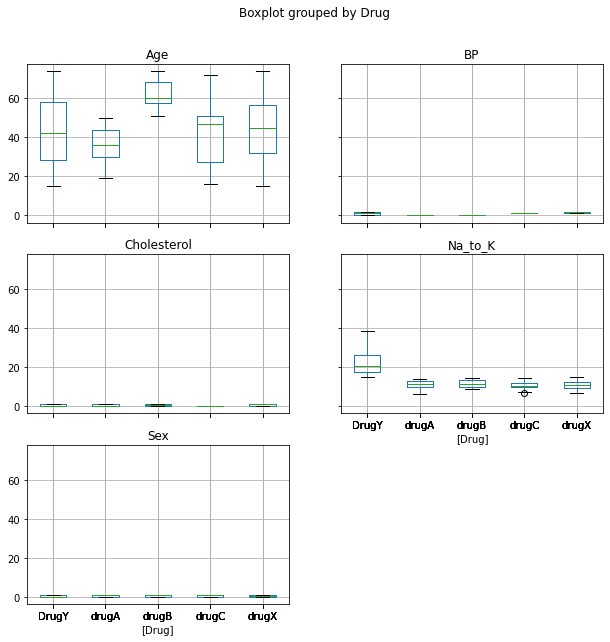

In [69]:
drug_encoded.boxplot(by='Drug', column=list(drug_encoded).remove('Drug'), figsize=(10, 10))

### Encoding

#### StandardScaler()

In [70]:
std_scaler.fit(drug_x_train)

StandardScaler()

In [71]:
std_drug_x_train = std_scaler.transform(drug_x_train)
std_drug_x_test = std_scaler.transform(drug_x_test)

In [72]:
knn_model(3, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[20  1  0  1  1]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  2  0  2  0]
 [ 0  0  1  0 12]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.87      0.93        23
       drugA       0.67      1.00      0.80         6
       drugB       0.80      1.00      0.89         4
       drugC       0.67      0.50      0.57         4
       drugX       0.92      0.92      0.92        13

    accuracy                           0.88        50
   macro avg       0.81      0.86      0.82        50
weighted avg       0.90      0.88      0.88        50



In [73]:
knn_model(3, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[21  1  0  1  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.96
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.91      0.95        23
       drugA       0.86      1.00      0.92         6
       drugB       1.00      1.00      1.00         4
       drugC       0.80      1.00      0.89         4
       drugX       1.00      1.00      1.00        13

    accuracy                           0.96        50
   macro avg       0.93      0.98      0.95        50
weighted avg       0.97      0.96      0.96        50



In [74]:
knn_model(5, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[20  1  0  1  1]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  2  2]
 [ 0  0  1  0 12]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.87      0.93        23
       drugA       0.86      1.00      0.92         6
       drugB       0.80      1.00      0.89         4
       drugC       0.67      0.50      0.57         4
       drugX       0.80      0.92      0.86        13

    accuracy                           0.88        50
   macro avg       0.82      0.86      0.83        50
weighted avg       0.89      0.88      0.88        50



In [75]:
knn_model(7, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 13]]
Accuracy Score
 0.96
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.50      0.67         4
       drugX       0.87      1.00      0.93        13

    accuracy                           0.96        50
   macro avg       0.97      0.90      0.92        50
weighted avg       0.97      0.96      0.95        50



In [76]:
knn_model(7, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[22  0  0  0  1]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.98
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        23
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



In [77]:
knn_model(9, std_drug_x_train, std_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 1.0
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#### MinMaxScaler()

In [78]:
mm_scaler.fit(drug_x_train)

MinMaxScaler()

In [79]:
mm_drug_x_train = mm_scaler.transform(drug_x_train)
mm_drug_x_test = mm_scaler.transform(drug_x_test)

In [80]:
knn_model(3, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[16  1  1  2  3]
 [ 0  6  0  0  0]
 [ 1  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 12]]
Accuracy Score
 0.82
Classification Report
               precision    recall  f1-score   support

       DrugY       0.89      0.70      0.78        23
       drugA       0.86      1.00      0.92         6
       drugB       0.75      0.75      0.75         4
       drugC       0.67      1.00      0.80         4
       drugX       0.80      0.92      0.86        13

    accuracy                           0.82        50
   macro avg       0.79      0.87      0.82        50
weighted avg       0.83      0.82      0.82        50



In [81]:
knn_model(3, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[17  1  1  2  2]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.74      0.85        23
       drugA       0.86      1.00      0.92         6
       drugB       0.80      1.00      0.89         4
       drugC       0.67      1.00      0.80         4
       drugX       0.87      1.00      0.93        13

    accuracy                           0.88        50
   macro avg       0.84      0.95      0.88        50
weighted avg       0.91      0.88      0.88        50



In [82]:
knn_model(5, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[17  1  1  1  3]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.74      0.85        23
       drugA       0.86      1.00      0.92         6
       drugB       0.80      1.00      0.89         4
       drugC       0.80      1.00      0.89         4
       drugX       0.81      1.00      0.90        13

    accuracy                           0.88        50
   macro avg       0.85      0.95      0.89        50
weighted avg       0.90      0.88      0.88        50



In [83]:
knn_model(7, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[18  1  1  1  2]
 [ 1  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       0.95      0.78      0.86        23
       drugA       0.83      0.83      0.83         6
       drugB       0.80      1.00      0.89         4
       drugC       0.80      1.00      0.89         4
       drugX       0.87      1.00      0.93        13

    accuracy                           0.88        50
   macro avg       0.85      0.92      0.88        50
weighted avg       0.89      0.88      0.88        50



In [84]:
knn_model(7, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[18  0  1  1  3]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.9
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      0.78      0.88        23
       drugA       1.00      1.00      1.00         6
       drugB       0.80      1.00      0.89         4
       drugC       0.80      1.00      0.89         4
       drugX       0.81      1.00      0.90        13

    accuracy                           0.90        50
   macro avg       0.88      0.96      0.91        50
weighted avg       0.92      0.90      0.90        50



In [85]:
knn_model(9, mm_drug_x_train, mm_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[19  1  0  1  2]
 [ 1  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.9
Classification Report
               precision    recall  f1-score   support

       DrugY       0.95      0.83      0.88        23
       drugA       0.83      0.83      0.83         6
       drugB       1.00      1.00      1.00         4
       drugC       0.80      1.00      0.89         4
       drugX       0.87      1.00      0.93        13

    accuracy                           0.90        50
   macro avg       0.89      0.93      0.91        50
weighted avg       0.91      0.90      0.90        50



#### RobustScaler()

In [86]:
rob_scaler.fit(drug_x_train)

RobustScaler()

In [87]:
rob_drug_x_train = rob_scaler.transform(drug_x_train)
rob_drug_x_test = rob_scaler.transform(drug_x_test)

In [88]:
knn_model(3, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0  4  0  0]
 [ 0  2  0  2  0]
 [ 0  0  2  1 10]]
Accuracy Score
 0.88
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       0.71      0.83      0.77         6
       drugB       0.67      1.00      0.80         4
       drugC       0.50      0.50      0.50         4
       drugX       1.00      0.77      0.87        13

    accuracy                           0.88        50
   macro avg       0.78      0.82      0.79        50
weighted avg       0.90      0.88      0.88        50



In [89]:
knn_model(3, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0  4  0  0]
 [ 0  2  0  2  0]
 [ 0  0  1  1 11]]
Accuracy Score
 0.9
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       0.71      0.83      0.77         6
       drugB       0.80      1.00      0.89         4
       drugC       0.50      0.50      0.50         4
       drugX       1.00      0.85      0.92        13

    accuracy                           0.90        50
   macro avg       0.80      0.84      0.81        50
weighted avg       0.91      0.90      0.90        50



In [90]:
knn_model(5, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  2  2]
 [ 0  0  1  0 12]]
Accuracy Score
 0.94
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         6
       drugB       0.80      1.00      0.89         4
       drugC       1.00      0.50      0.67         4
       drugX       0.86      0.92      0.89        13

    accuracy                           0.94        50
   macro avg       0.93      0.88      0.89        50
weighted avg       0.95      0.94      0.94        50



In [91]:
knn_model(7, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  1  0  2  1]
 [ 0  0  1  0 12]]
Accuracy Score
 0.94
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       0.86      1.00      0.92         6
       drugB       0.80      1.00      0.89         4
       drugC       1.00      0.50      0.67         4
       drugX       0.92      0.92      0.92        13

    accuracy                           0.94        50
   macro avg       0.92      0.88      0.88        50
weighted avg       0.95      0.94      0.94        50



In [92]:
knn_model(7, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 13]]
Accuracy Score
 0.96
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.50      0.67         4
       drugX       0.87      1.00      0.93        13

    accuracy                           0.96        50
   macro avg       0.97      0.90      0.92        50
weighted avg       0.97      0.96      0.95        50



In [93]:
knn_model(9, rob_drug_x_train, rob_drug_x_test, drug_y_train, drug_y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[23  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  2  0  2  0]
 [ 0  0  0  0 13]]
Accuracy Score
 0.96
Classification Report
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugA       0.75      1.00      0.86         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.50      0.67         4
       drugX       1.00      1.00      1.00        13

    accuracy                           0.96        50
   macro avg       0.95      0.90      0.90        50
weighted avg       0.97      0.96      0.96        50



# fetal_health.csv

In [94]:
fetal = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\fetal_health.csv")
fetal.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


In [95]:
get_metadata(fetal)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_shor

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Dataframe Shape
 (2126, 22)
Number of Duplicate Rows
 13
NULL Values Check
baseline value 0
accelerations 0
fetal_movement 0
uterine_contractions 0
light_decelerations 0
severe_decelerations 0
prolongued_decelerations 0
abnormal_short_term_variability 0
mean_value_of_short_term_variability 0
percentage_of_time_with_abnormal_long_term_variability 0
mean_value_of_long_term_variability 0
histogram_width 0
histogram_min 0
histogram_max 0
histogram_number_of_peaks 0
histogram_number_of_zeroes 0
histogram_mode 0
histogram_mean 0
histogram_median 0
histogram_variance 0
histogram_tendency 0
fetal_health 0
UNIQUE VALUES IN EVERY COLUMN
baseline value
[120. 132. 133. 134. 122. 151. 150. 131. 130. 129. 128. 124. 115. 114.
 116. 158. 156. 148. 149. 146. 144. 142. 136. 141. 138. 140. 154. 145.
 139. 125. 123. 159. 143. 119. 121. 127. 126. 118. 135. 137. 147. 157.
 117. 152. 112. 106. 110. 160.]
--------------------------------------------------------------------------------
accelerations
[0.    0.0

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


### No Encoding Needed 

### Train Test Split

In [96]:
fetal_X = fetal.iloc[:,:-1]
fetal_Y = fetal.iloc[:,-1]

In [97]:
fetal_X_train, fetal_X_test, fetal_Y_train, fetal_Y_test = train_test_split(fetal_X, fetal_Y, test_size=0.2, \
                                                                            random_state=1, stratify=fetal_Y)

## Naive Bayes

'histogram_tendency' has negative valued data. SO, MultinomialNB() cannot be used

In [98]:
naive_bayes_model(gaussian_model, fetal_X_train, fetal_X_test, fetal_Y_train, fetal_Y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[266  55  11]
 [ 10  49   0]
 [  0  13  22]]
Accuracy Score
 0.7910798122065728
Classification Report
               precision    recall  f1-score   support

         1.0       0.96      0.80      0.88       332
         2.0       0.42      0.83      0.56        59
         3.0       0.67      0.63      0.65        35

    accuracy                           0.79       426
   macro avg       0.68      0.75      0.69       426
weighted avg       0.86      0.79      0.81       426



In [99]:
naive_bayes_model(bernoulli_model, fetal_X_train, fetal_X_test, fetal_Y_train, fetal_Y_test)

Model
 BernoulliNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[295  30   7]
 [ 22  35   2]
 [  3  13  19]]
Accuracy Score
 0.8192488262910798
Classification Report
               precision    recall  f1-score   support

         1.0       0.92      0.89      0.90       332
         2.0       0.45      0.59      0.51        59
         3.0       0.68      0.54      0.60        35

    accuracy                           0.82       426
   macro avg       0.68      0.67      0.67       426
weighted avg       0.84      0.82      0.83       426



## KNN

### Detecting Ouliers

In [100]:
fetal.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0


array([[<AxesSubplot:title={'center':'abnormal_short_term_variability'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'accelerations'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'baseline value'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'fetal_movement'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_max'}, xlabel='[fetal_health]'>],
       [<AxesSubplot:title={'center':'histogram_mean'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_median'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_min'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_mode'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}, xlabel='[fetal_health]'>],
       [<AxesSubplot:title={'center':'histogram_number_of_zeroes'}, xlabel='[fetal_health]'>,
        <AxesSubplot:title={'center':'histogram_tendency'

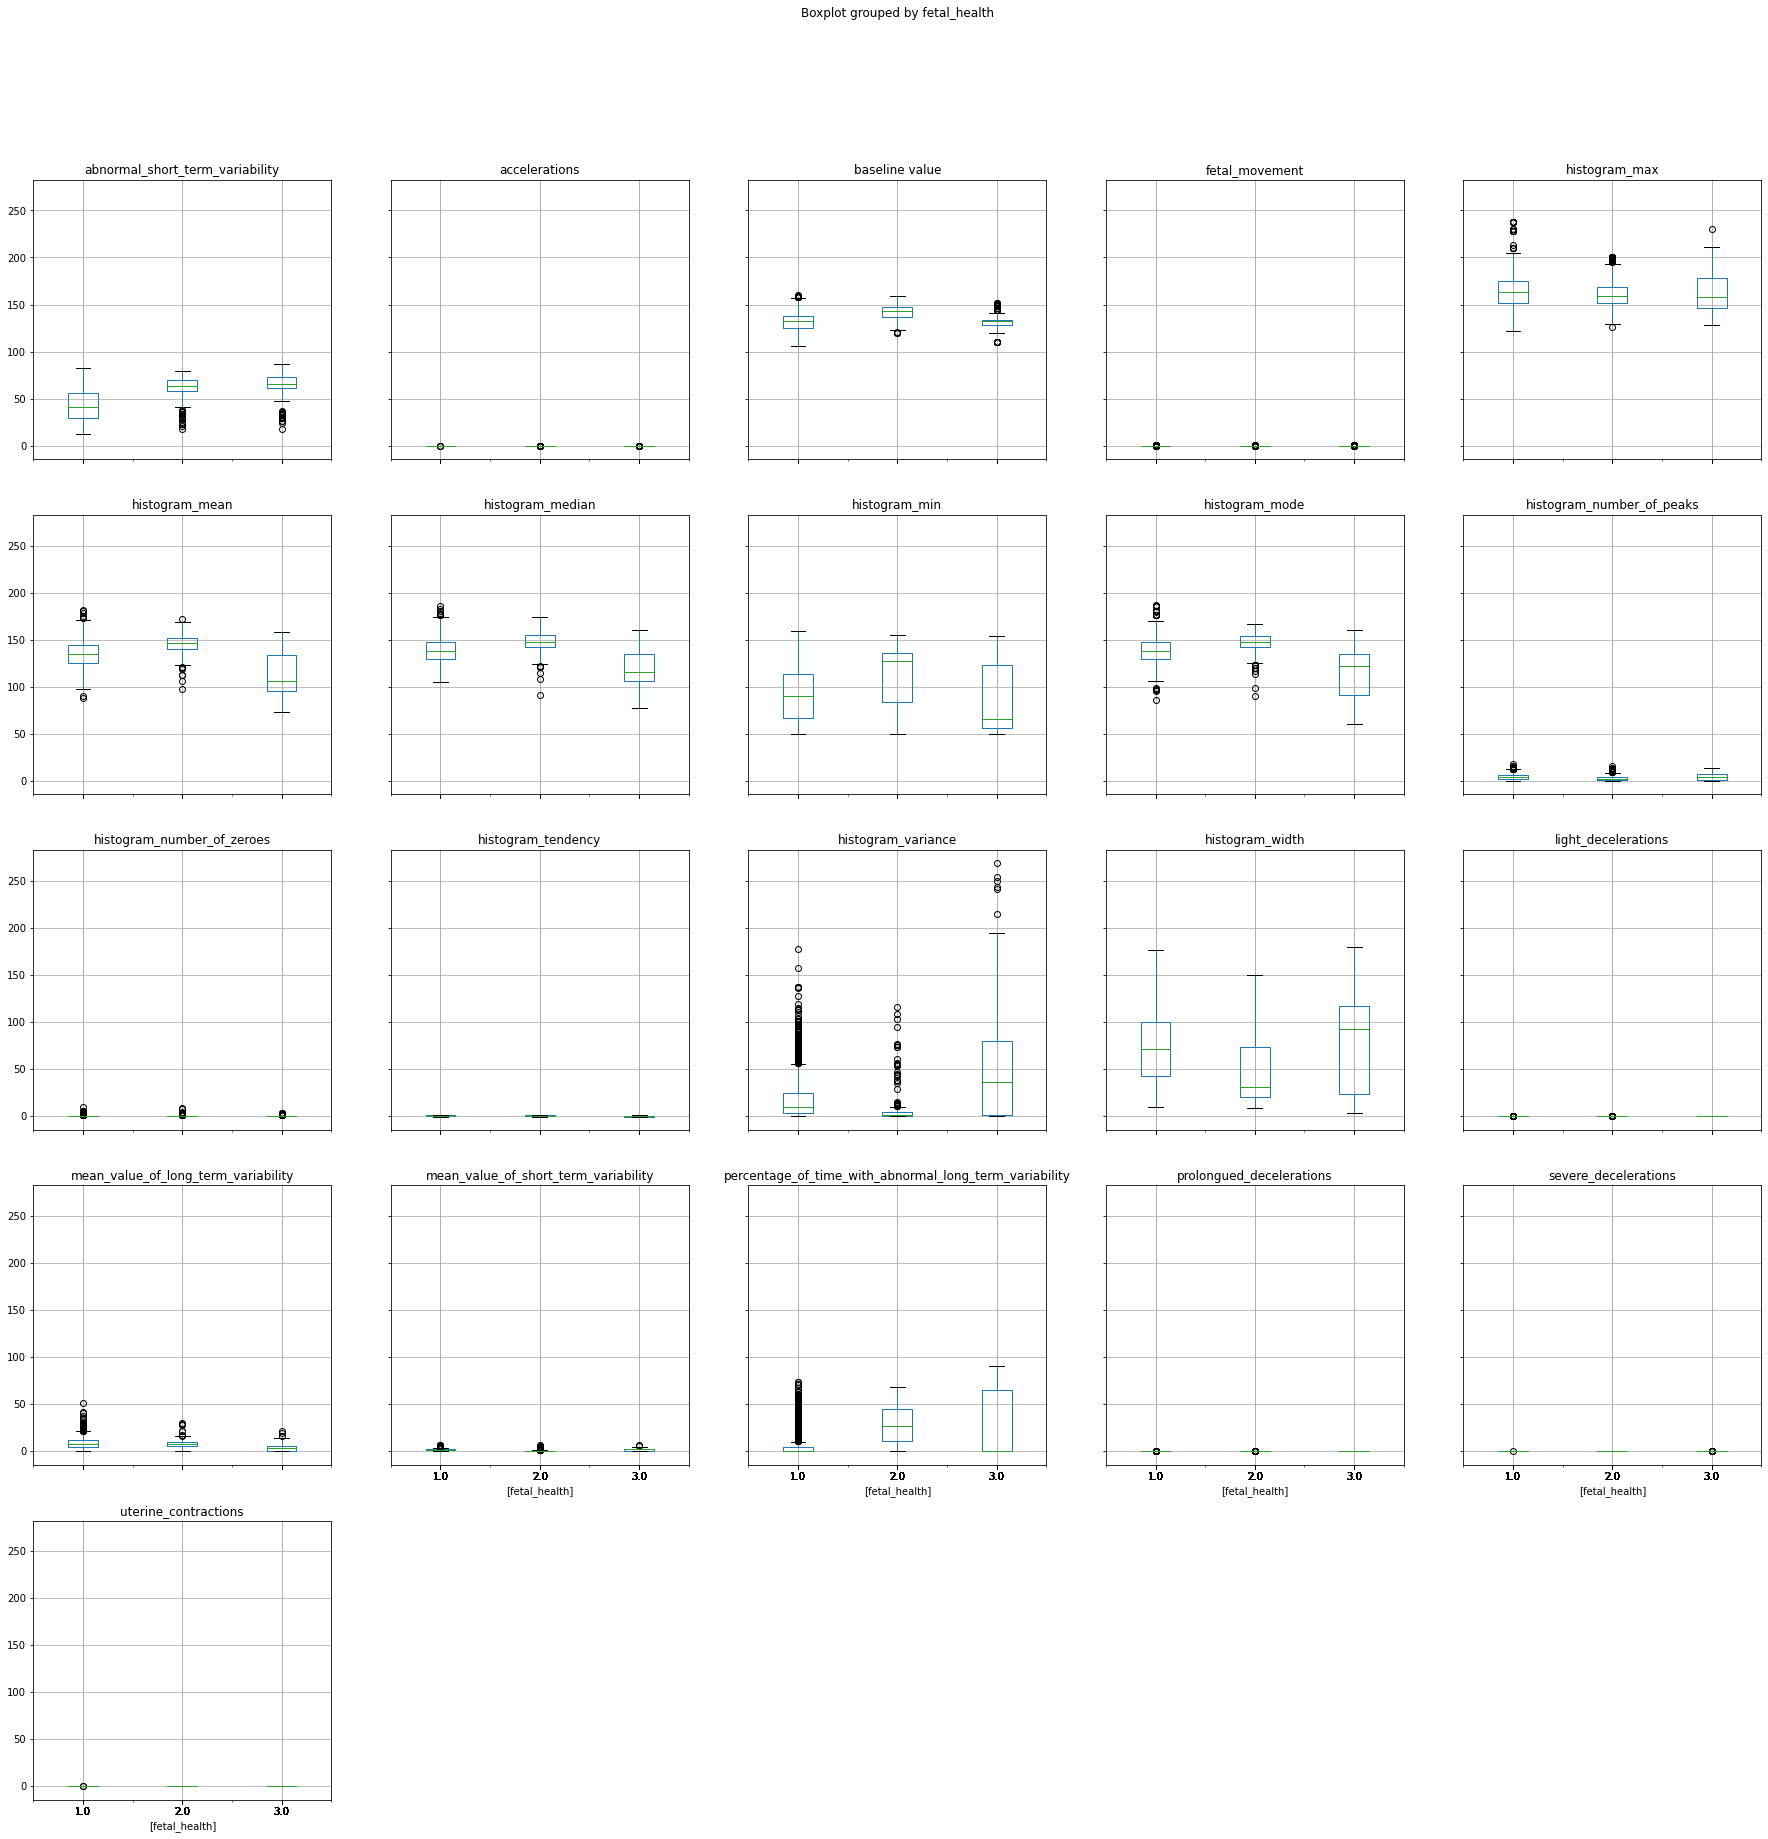

In [101]:
fetal.boxplot(by='fetal_health', column=list(fetal).remove('fetal_health'), figsize=(30, 30))

### Scaling

#### StandardScaler()

In [102]:
std_scaler.fit(fetal_X_train)

StandardScaler()

In [103]:
std_fetal_X_train = std_scaler.transform(fetal_X_train)
std_fetal_X_test = std_scaler.transform(fetal_X_test)

In [104]:
knn_model(3, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[326   6   0]
 [ 19  38   2]
 [  3   4  28]]
Accuracy Score
 0.92018779342723
Classification Report
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.79      0.64      0.71        59
         3.0       0.93      0.80      0.86        35

    accuracy                           0.92       426
   macro avg       0.89      0.81      0.84       426
weighted avg       0.92      0.92      0.92       426



In [105]:
knn_model(3, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[324   7   1]
 [ 15  42   2]
 [  2   3  30]]
Accuracy Score
 0.9295774647887324
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.81      0.71      0.76        59
         3.0       0.91      0.86      0.88        35

    accuracy                           0.93       426
   macro avg       0.89      0.85      0.87       426
weighted avg       0.93      0.93      0.93       426



In [106]:
knn_model(5, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[327   3   2]
 [ 15  42   2]
 [  3   2  30]]
Accuracy Score
 0.9366197183098591
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       332
         2.0       0.89      0.71      0.79        59
         3.0       0.88      0.86      0.87        35

    accuracy                           0.94       426
   macro avg       0.91      0.85      0.88       426
weighted avg       0.93      0.94      0.93       426



In [107]:
knn_model(7, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[326   5   1]
 [ 21  36   2]
 [  3   3  29]]
Accuracy Score
 0.9178403755868545
Classification Report
               precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       332
         2.0       0.82      0.61      0.70        59
         3.0       0.91      0.83      0.87        35

    accuracy                           0.92       426
   macro avg       0.89      0.81      0.84       426
weighted avg       0.91      0.92      0.91       426



In [108]:
knn_model(7, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[326   5   1]
 [ 14  43   2]
 [  2   4  29]]
Accuracy Score
 0.9342723004694836
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       332
         2.0       0.83      0.73      0.77        59
         3.0       0.91      0.83      0.87        35

    accuracy                           0.93       426
   macro avg       0.90      0.85      0.87       426
weighted avg       0.93      0.93      0.93       426



In [109]:
knn_model(9, std_fetal_X_train, std_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[325   5   2]
 [ 14  43   2]
 [  3   4  28]]
Accuracy Score
 0.9295774647887324
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.83      0.73      0.77        59
         3.0       0.88      0.80      0.84        35

    accuracy                           0.93       426
   macro avg       0.88      0.84      0.86       426
weighted avg       0.93      0.93      0.93       426



#### MinMaxScaler()

In [110]:
mm_scaler.fit(fetal_X_train)

MinMaxScaler()

In [111]:
mm_fetal_X_train = mm_scaler.transform(fetal_X_train)
mm_fetal_X_test = mm_scaler.transform(fetal_X_test)

In [112]:
knn_model(3, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[326   6   0]
 [ 20  37   2]
 [  3   5  27]]
Accuracy Score
 0.9154929577464789
Classification Report
               precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       332
         2.0       0.77      0.63      0.69        59
         3.0       0.93      0.77      0.84        35

    accuracy                           0.92       426
   macro avg       0.88      0.79      0.83       426
weighted avg       0.91      0.92      0.91       426



In [113]:
knn_model(3, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[325   7   0]
 [ 16  41   2]
 [  2   4  29]]
Accuracy Score
 0.9272300469483568
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.79      0.69      0.74        59
         3.0       0.94      0.83      0.88        35

    accuracy                           0.93       426
   macro avg       0.89      0.83      0.86       426
weighted avg       0.92      0.93      0.92       426



In [114]:
knn_model(5, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[326   5   1]
 [ 15  42   2]
 [  2   5  28]]
Accuracy Score
 0.9295774647887324
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       332
         2.0       0.81      0.71      0.76        59
         3.0       0.90      0.80      0.85        35

    accuracy                           0.93       426
   macro avg       0.89      0.83      0.86       426
weighted avg       0.93      0.93      0.93       426



In [115]:
knn_model(5, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  5
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[326   5   1]
 [ 10  47   2]
 [  2   3  30]]
Accuracy Score
 0.9460093896713615
Classification Report
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.85      0.80      0.82        59
         3.0       0.91      0.86      0.88        35

    accuracy                           0.95       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.94      0.95      0.95       426



In [116]:
knn_model(7, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[324   7   1]
 [ 11  46   2]
 [  3   3  29]]
Accuracy Score
 0.9366197183098591
Classification Report
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.82      0.78      0.80        59
         3.0       0.91      0.83      0.87        35

    accuracy                           0.94       426
   macro avg       0.90      0.86      0.88       426
weighted avg       0.94      0.94      0.94       426



In [117]:
knn_model(9, mm_fetal_X_train, mm_fetal_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[325   6   1]
 [ 15  42   2]
 [  3   4  28]]
Accuracy Score
 0.9272300469483568
Classification Report
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       332
         2.0       0.81      0.71      0.76        59
         3.0       0.90      0.80      0.85        35

    accuracy                           0.93       426
   macro avg       0.89      0.83      0.86       426
weighted avg       0.92      0.93      0.92       426



#### RobustScaler()

In [118]:
rob_scaler.fit(fetal_X_train)

RobustScaler()

In [119]:
rob_X_train = rob_scaler.transform(fetal_X_train)
rob_X_test = rob_scaler.transform(fetal_X_test)

In [120]:
knn_model(3, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[321  11   0]
 [ 19  40   0]
 [  5   2  28]]
Accuracy Score
 0.9131455399061033
Classification Report
               precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       332
         2.0       0.75      0.68      0.71        59
         3.0       1.00      0.80      0.89        35

    accuracy                           0.91       426
   macro avg       0.90      0.81      0.85       426
weighted avg       0.91      0.91      0.91       426



In [121]:
knn_model(3, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[320  12   0]
 [ 16  43   0]
 [  3   3  29]]
Accuracy Score
 0.92018779342723
Classification Report
               precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       332
         2.0       0.74      0.73      0.74        59
         3.0       1.00      0.83      0.91        35

    accuracy                           0.92       426
   macro avg       0.90      0.84      0.87       426
weighted avg       0.92      0.92      0.92       426



In [122]:
knn_model(5, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[325   7   0]
 [ 18  41   0]
 [  3   3  29]]
Accuracy Score
 0.9272300469483568
Classification Report
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.80      0.69      0.75        59
         3.0       1.00      0.83      0.91        35

    accuracy                           0.93       426
   macro avg       0.91      0.83      0.87       426
weighted avg       0.93      0.93      0.92       426



In [123]:
knn_model(5, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  5
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[326   6   0]
 [ 12  46   1]
 [  2   2  31]]
Accuracy Score
 0.9460093896713615
Classification Report
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.85      0.78      0.81        59
         3.0       0.97      0.89      0.93        35

    accuracy                           0.95       426
   macro avg       0.93      0.88      0.90       426
weighted avg       0.94      0.95      0.94       426



In [124]:
knn_model(7, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='minkowski')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[324   8   0]
 [ 22  37   0]
 [  3   4  28]]
Accuracy Score
 0.9131455399061033
Classification Report
               precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       332
         2.0       0.76      0.63      0.69        59
         3.0       1.00      0.80      0.89        35

    accuracy                           0.91       426
   macro avg       0.89      0.80      0.84       426
weighted avg       0.91      0.91      0.91       426



In [125]:
knn_model(9, rob_X_train, rob_X_test, fetal_Y_train, fetal_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[325   7   0]
 [ 20  39   0]
 [  3   3  29]]
Accuracy Score
 0.9225352112676056
Classification Report
               precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       332
         2.0       0.80      0.66      0.72        59
         3.0       1.00      0.83      0.91        35

    accuracy                           0.92       426
   macro avg       0.91      0.82      0.86       426
weighted avg       0.92      0.92      0.92       426



# income_evaluation.csv

In [126]:
income = pd.read_csv(r"D:\Inceptez\Data Science\Datasets\income_evaluation.csv")
income.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [127]:
get_metadata(income)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
STATISTICAL INFORMATION



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Dataframe Shape
 (32561, 15)
Number of Duplicate Rows
 24
NULL Values Check
age 0
 workclass 0
 fnlwgt 0
 education 0
 education-num 0
 marital-status 0
 occupation 0
 relationship 0
 race 0
 sex 0
 capital-gain 0
 capital-loss 0
 hours-per-week 0
 native-country 0
 income 0
UNIQUE VALUES IN EVERY COLUMN
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------------------------------------
 workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------------------------------------
 fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
--------------------------------------------------------------------------------
 education
[' Bachelors' ' HS

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [128]:
# income.drop_duplicates(inplace=True)

In [129]:
income.shape

(32561, 15)

In [130]:
income[' workclass'].replace(' ?', np.NaN, inplace=True)
income[' occupation'].replace(' ?', np.NaN, inplace=True)
income[' native-country'].replace(' ?', np.NaN, inplace=True)

In [131]:
income.fillna(income.mode().iloc[0], inplace=True)

In [132]:
get_metadata(income)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
STATISTICAL INFORMATION



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Dataframe Shape
 (32561, 15)
Number of Duplicate Rows
 24
NULL Values Check
age 0
 workclass 0
 fnlwgt 0
 education 0
 education-num 0
 marital-status 0
 occupation 0
 relationship 0
 race 0
 sex 0
 capital-gain 0
 capital-loss 0
 hours-per-week 0
 native-country 0
 income 0
UNIQUE VALUES IN EVERY COLUMN
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------------------------------------
 workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------------------------------------------------------------------------
 fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
--------------------------------------------------------------------------------
 education
[' Bachelors' ' HS-grad

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [133]:
income[' occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

## Encoding

In [134]:
income_categorical_cols = [var for var in income.columns if income[var].dtype=='O']
income_numerical_cols = [var for var in income.columns if income[var].dtype!='O']

In [135]:
income_categorical_cols.remove(' income')
income_categorical_cols

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country']

In [136]:
ordinal_encoder = OrdinalEncoder()

income_feature_encoded = ordinal_encoder.fit_transform(income[income_categorical_cols])
income_feature_encoded_df = pd.DataFrame(income_feature_encoded, columns=income_categorical_cols)
income_feature_encoded_df[income_numerical_cols] = income[income_numerical_cols]
income_feature_encoded_df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,39,77516,13,2174,0,40
1,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,50,83311,13,0,0,13
2,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,38,215646,9,0,0,40
3,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,53,234721,7,0,0,40
4,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,27,257302,12,0,0,38
32557,3.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,40,154374,9,0,0,40
32558,3.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,58,151910,9,0,0,40
32559,3.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,22,201490,9,0,0,20


### Train Test Split

In [137]:
income_X = income_feature_encoded_df
income_Y = income[' income']

In [138]:
income_X_train, income_X_test, income_Y_train, income_Y_test = train_test_split(income_X, income_Y, test_size=0.25, \
                                                                               random_state = 24, stratify=income_Y)

## Naive Bayes

In [139]:
naive_bayes_model(gaussian_model, income_X_train, income_X_test, income_Y_train, income_Y_test)

Model
 GaussianNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[5853  328]
 [1346  614]]
Accuracy Score
 0.7943741555091512
Classification Report
               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      6181
        >50K       0.65      0.31      0.42      1960

    accuracy                           0.79      8141
   macro avg       0.73      0.63      0.65      8141
weighted avg       0.77      0.79      0.77      8141



In [140]:
naive_bayes_model(multinomial_model, income_X_train, income_X_test, income_Y_train, income_Y_test)

Model
 MultinomialNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[5899  282]
 [1497  463]]
Accuracy Score
 0.7814764770912664
Classification Report
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6181
        >50K       0.62      0.24      0.34      1960

    accuracy                           0.78      8141
   macro avg       0.71      0.60      0.61      8141
weighted avg       0.76      0.78      0.74      8141



In [141]:
naive_bayes_model(bernoulli_model, income_X_train, income_X_test, income_Y_train, income_Y_test)

Model
 BernoulliNB()
Training Model...

Model Prediction...
Confusion Matrix
 [[4515 1666]
 [ 538 1422]]
Accuracy Score
 0.7292715882569709
Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.73      0.80      6181
        >50K       0.46      0.73      0.56      1960

    accuracy                           0.73      8141
   macro avg       0.68      0.73      0.68      8141
weighted avg       0.79      0.73      0.75      8141



## KNN

In [142]:
income_feature_encoded_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,6.0,9.0,4.0,0.0,1.0,4.0,1.0,38.0,39,77516,13,2174,0,40
1,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,50,83311,13,0,0,13
2,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,38,215646,9,0,0,40
3,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,53,234721,7,0,0,40
4,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,28,338409,13,0,0,40


array([[<AxesSubplot:title={'center':' capital-gain'}, xlabel='[ income]'>,
        <AxesSubplot:title={'center':' capital-loss'}, xlabel='[ income]'>],
       [<AxesSubplot:title={'center':' education-num'}, xlabel='[ income]'>,
        <AxesSubplot:title={'center':' fnlwgt'}, xlabel='[ income]'>],
       [<AxesSubplot:title={'center':' hours-per-week'}, xlabel='[ income]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[ income]'>]],
      dtype=object)

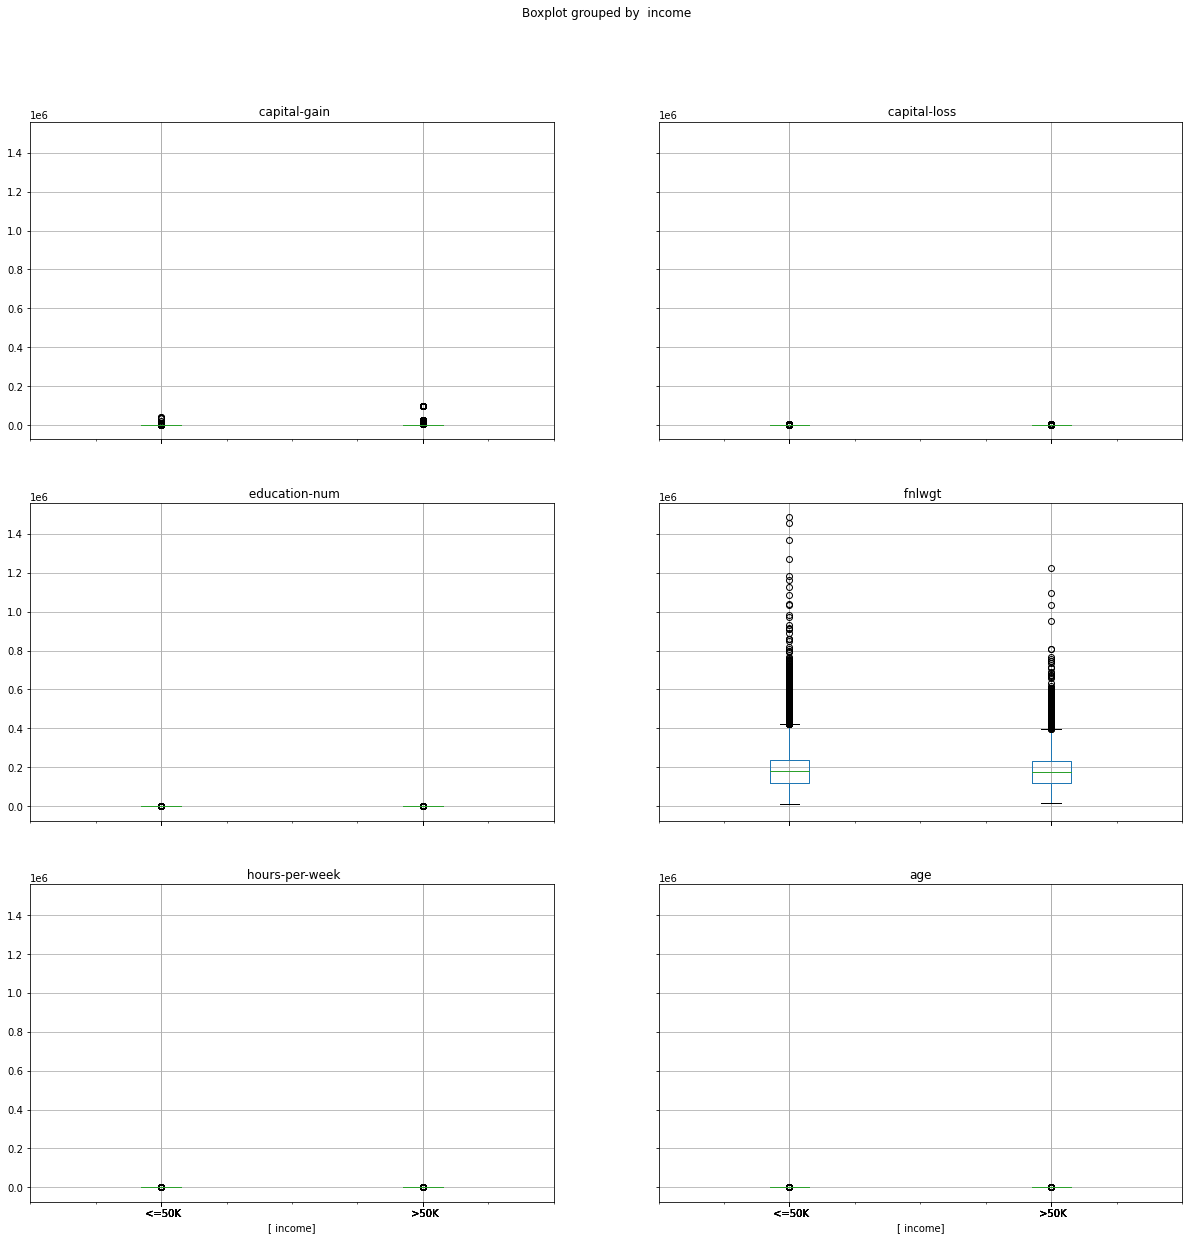

In [143]:
income.boxplot(by=' income', column=list(income).remove(' income'), figsize=(20,20))

#### StandardScaler()

In [144]:
std_scaler.fit(income_X_train)

StandardScaler()

In [145]:
std_income_X_train = std_scaler.transform(income_X_train)
std_income_X_test = std_scaler.transform(income_X_test)

In [146]:
knn_model(3, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5544  637]
 [ 822 1138]]
Accuracy Score
 0.8207836875076772
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6181
        >50K       0.64      0.58      0.61      1960

    accuracy                           0.82      8141
   macro avg       0.76      0.74      0.75      8141
weighted avg       0.82      0.82      0.82      8141



In [147]:
knn_model(3, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5528  653]
 [ 821 1139]]
Accuracy Score
 0.8189411620194079
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      6181
        >50K       0.64      0.58      0.61      1960

    accuracy                           0.82      8141
   macro avg       0.75      0.74      0.74      8141
weighted avg       0.81      0.82      0.82      8141



In [148]:
knn_model(5, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5596  585]
 [ 812 1148]]
Accuracy Score
 0.8283994595258568
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.66      0.59      0.62      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.82      0.83      0.82      8141



In [149]:
knn_model(5, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  5
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5584  597]
 [ 811 1149]]
Accuracy Score
 0.8270482741677927
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      6181
        >50K       0.66      0.59      0.62      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.74      0.75      8141
weighted avg       0.82      0.83      0.82      8141



In [150]:
knn_model(7, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5629  552]
 [ 814 1146]]
Accuracy Score
 0.8322073455349466
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.67      0.58      0.63      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.83      0.83      0.83      8141



In [151]:
knn_model(7, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5619  562]
 [ 807 1153]]
Accuracy Score
 0.8318388404372927
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.67      0.59      0.63      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.83      0.83      0.83      8141



In [152]:
knn_model(9, std_income_X_train, std_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5646  535]
 [ 809 1151]]
Accuracy Score
 0.8349097162510748
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.68      0.59      0.63      1960

    accuracy                           0.83      8141
   macro avg       0.78      0.75      0.76      8141
weighted avg       0.83      0.83      0.83      8141



#### MinMaxScaler()

In [153]:
mm_scaler.fit(income_X_train)

MinMaxScaler()

In [154]:
mm_income_X_train = mm_scaler.transform(income_X_train)
mm_income_X_test = mm_scaler.transform(income_X_test)

In [155]:
knn_model(3, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5544  637]
 [ 853 1107]]
Accuracy Score
 0.8169758014985874
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6181
        >50K       0.63      0.56      0.60      1960

    accuracy                           0.82      8141
   macro avg       0.75      0.73      0.74      8141
weighted avg       0.81      0.82      0.81      8141



In [156]:
knn_model(3, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5522  659]
 [ 855 1105]]
Accuracy Score
 0.8140277607173566
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      6181
        >50K       0.63      0.56      0.59      1960

    accuracy                           0.81      8141
   macro avg       0.75      0.73      0.74      8141
weighted avg       0.81      0.81      0.81      8141



In [157]:
knn_model(5, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5594  587]
 [ 851 1109]]
Accuracy Score
 0.8233632231912541
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.65      0.57      0.61      1960

    accuracy                           0.82      8141
   macro avg       0.76      0.74      0.75      8141
weighted avg       0.82      0.82      0.82      8141



In [158]:
knn_model(5, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  5
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5583  598]
 [ 854 1106]]
Accuracy Score
 0.8216435327355361
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6181
        >50K       0.65      0.56      0.60      1960

    accuracy                           0.82      8141
   macro avg       0.76      0.73      0.74      8141
weighted avg       0.81      0.82      0.82      8141



In [159]:
knn_model(7, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5629  552]
 [ 860 1100]]
Accuracy Score
 0.8265569340375876
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.67      0.56      0.61      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.74      0.75      8141
weighted avg       0.82      0.83      0.82      8141



In [160]:
knn_model(7, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5626  555]
 [ 848 1112]]
Accuracy Score
 0.8276624493305491
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.67      0.57      0.61      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.74      0.75      8141
weighted avg       0.82      0.83      0.82      8141



In [161]:
knn_model(9, mm_income_X_train, mm_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5641  540]
 [ 849 1111]]
Accuracy Score
 0.8293821397862671
Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6181
        >50K       0.67      0.57      0.62      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.74      0.75      8141
weighted avg       0.82      0.83      0.82      8141



#### RobustScaler()

In [162]:
rob_scaler.fit(income_X_train)

RobustScaler()

In [163]:
rob_income_X_train = rob_scaler.transform(income_X_train)
rob_income_X_test = rob_scaler.transform(income_X_test)

In [164]:
knn_model(3, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test)

No of Neighbors :  3
Weights : uniform
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5607  574]
 [ 747 1213]]
Accuracy Score
 0.8377349219997543
Classification Report
               precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      6181
        >50K       0.68      0.62      0.65      1960

    accuracy                           0.84      8141
   macro avg       0.78      0.76      0.77      8141
weighted avg       0.83      0.84      0.84      8141



In [165]:
knn_model(3, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  3
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5588  593]
 [ 739 1221]]
Accuracy Score
 0.8363837366416902
Classification Report
               precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      6181
        >50K       0.67      0.62      0.65      1960

    accuracy                           0.84      8141
   macro avg       0.78      0.76      0.77      8141
weighted avg       0.83      0.84      0.83      8141



In [166]:
knn_model(5, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  5
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5655  526]
 [ 734 1226]]
Accuracy Score
 0.8452278589853827
Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      6181
        >50K       0.70      0.63      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.79      0.77      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [167]:
knn_model(5, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  5
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5659  522]
 [ 722 1238]]
Accuracy Score
 0.8471932195062032
Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6181
        >50K       0.70      0.63      0.67      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [168]:
knn_model(7, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance')

No of Neighbors :  7
Weights : distance
Metric :  minkowski
Training Model...

Model Prediction...
Confusion Matrix
 [[5695  486]
 [ 745 1215]]
Accuracy Score
 0.8487900749293699
Classification Report
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6181
        >50K       0.71      0.62      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [169]:
knn_model(7, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  7
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5684  497]
 [ 722 1238]]
Accuracy Score
 0.8502640953199853
Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6181
        >50K       0.71      0.63      0.67      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.85      0.85      8141



In [170]:
knn_model(9, rob_income_X_train, rob_income_X_test, income_Y_train, income_Y_test, weights='distance', metric='manhattan')

No of Neighbors :  9
Weights : distance
Metric :  manhattan
Training Model...

Model Prediction...
Confusion Matrix
 [[5703  478]
 [ 739 1221]]
Accuracy Score
 0.8505097653850878
Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6181
        >50K       0.72      0.62      0.67      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.79      8141
weighted avg       0.85      0.85      0.85      8141



# OVERALL K-NEAREST NEIGHBOR ANALYSIS

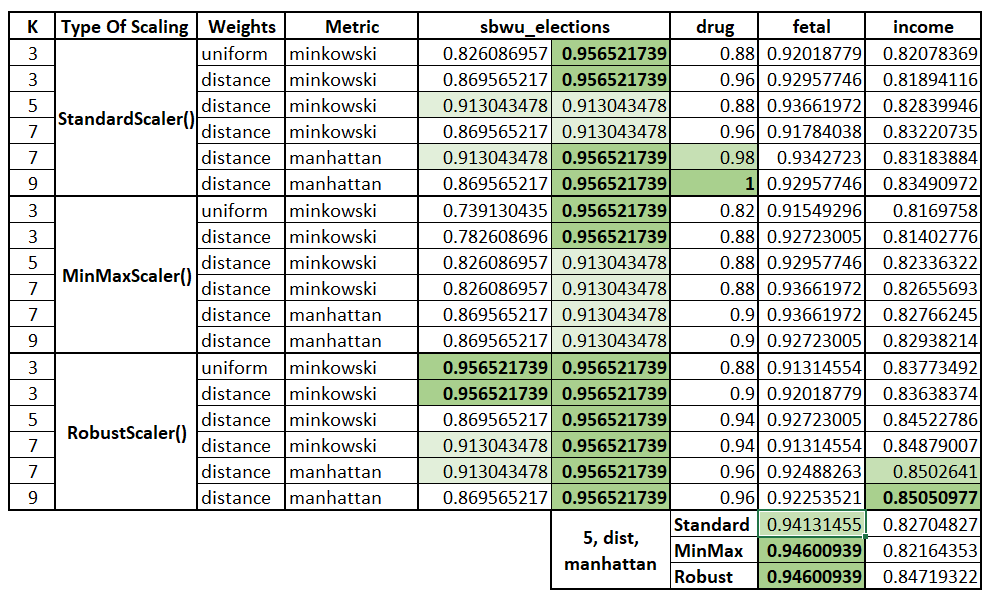